# CS 5480: Deep Learning - Homework 1 Coding Problems

**Name:** Simon Edmunds

**Student ID:** 12590227

**Due Date:** February 17, 2026 at 11.59 PM

---

## Instructions

- Complete all TODOs in the code cells below
- Add markdown cells with your analysis and interpretations where requested
- Include all plots with proper labels, legends, and titles
- Show all output (don't delete print statements)
- Submit this completed notebook (.ipynb file)

---

# Problem 5: Bias-Variance Through Experimentation (30 points)

## Objective

Empirically observe the bias-variance tradeoff by fitting polynomials of different degrees to noisy data. You will see firsthand how model complexity affects both training and generalization performance.

## Setup

Generate data from the function: $y = \sin(2\pi x) + \epsilon$ where $\epsilon \sim N(0, 0.3^2)$

## Part (a): Data Generation and Visualization (5 points)

Generate training and test datasets, then visualize them.

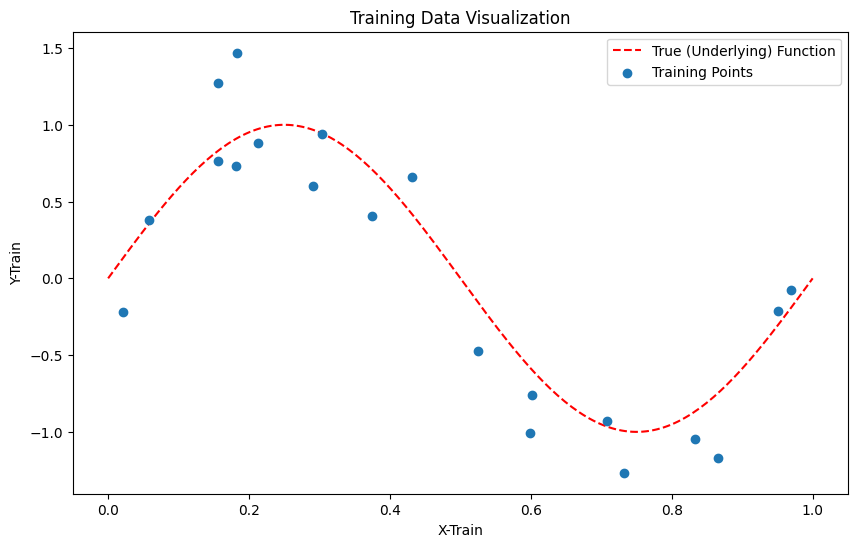

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# True function
def true_function(x):
    return np.sin(2 * np.pi * x)

# Generate training data (small sample)
n_train = 20
X_train = np.random.uniform(0, 1, n_train)
y_train = true_function(X_train) + np.random.normal(0, 0.3, n_train)

# Generate test data (larger, for evaluation)
n_test = 100
X_test = np.random.uniform(0, 1, n_test)
y_test = true_function(X_test) + np.random.normal(0, 0.3, n_test)

# TODO: Create a plot showing:
# 1. The true function (smooth curve from 0 to 1)
# 2. Training points (scatter plot)
# Label axes, add legend, and title

x_plot = np.linspace(0, 1, 200)

plt.figure(figsize=(10, 6))

# TODO: Plot the true function
plt.plot(x_plot, true_function(x_plot), color="r", zorder=-1, linestyle="--", label="True (Underlying) Function")

# TODO: Plot training data points
plt.scatter(X_train, y_train, label="Training Points")

# TODO: Add labels, legend, title
plt.title("Training Data Visualization")
plt.xlabel("X-Train")
plt.ylabel("Y-Train")
plt.legend()

plt.show()

## Part (b): Fit Polynomials of Different Degrees (7 points)

Fit polynomial models of degrees $d \in \{1, 3, 5, 9, 15\}$ to the training data.

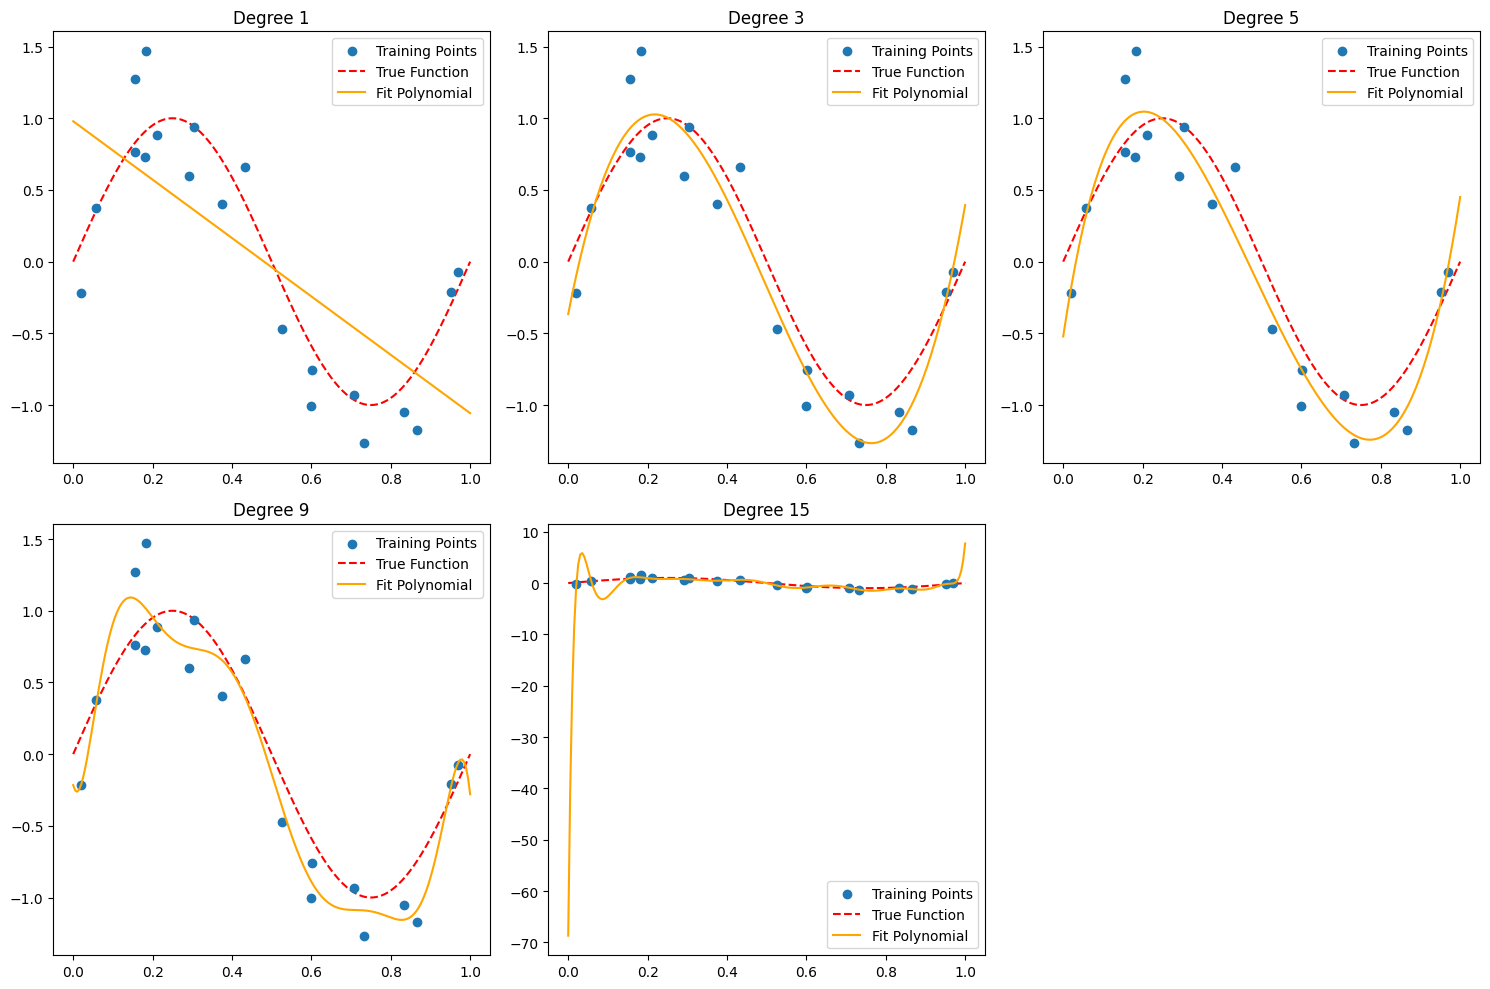

In [62]:
# Fit polynomials of different degrees
degrees = [1, 3, 5, 9, 15]
models = {}

for d in degrees:
    # TODO: Fit polynomial of degree d using np.polyfit
    # coeffs = ...
    models[d] = np.polyfit(x=X_train, y=y_train, deg=d)

# TODO: Create a figure with subplots (or one large plot)
# For each degree, plot:
# 1. Training data (scatter)
# 2. True function (smooth curve)
# 3. Fitted polynomial (smooth curve, use np.polyval)

x_plot = np.linspace(0, 1, 200)

# Option 1: Subplots (recommended for clarity)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, d in enumerate(degrees):
    ax = axes[i]

    # TODO: Plot on ax
    ax.scatter(X_train, y_train, label="Training Points")
    ax.plot(x_plot, true_function(x_plot), label="True Function", color="r", zorder=-1, linestyle="--")
    y_pred = np.polyval(models[d], x_plot)
    ax.plot(x_plot, y_pred, label="Fit Polynomial", color="orange")
    ax.set_title(f'Degree {d}')
    ax.legend()

# Remove the extra subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# TODO: You should observe:
# - Low degrees: smooth but miss the pattern (underfitting)
# - Medium degrees: capture the pattern reasonably
# - High degrees: wild oscillations between points (overfitting)

## Part (c): Compute Training and Test Errors (6 points)

For each polynomial degree, compute the Mean Squared Error on both training and test sets.

=== Test Errors by Degree ===
Degree 1: Training Error = 0.3501, Test Error = 0.2739
Degree 3: Training Error = 0.0487, Test Error = 0.1242
Degree 5: Training Error = 0.0473, Test Error = 0.1311
Degree 9: Training Error = 0.0372, Test Error = 0.1423
Degree 15: Training Error = 0.0259, Test Error = 27.0145


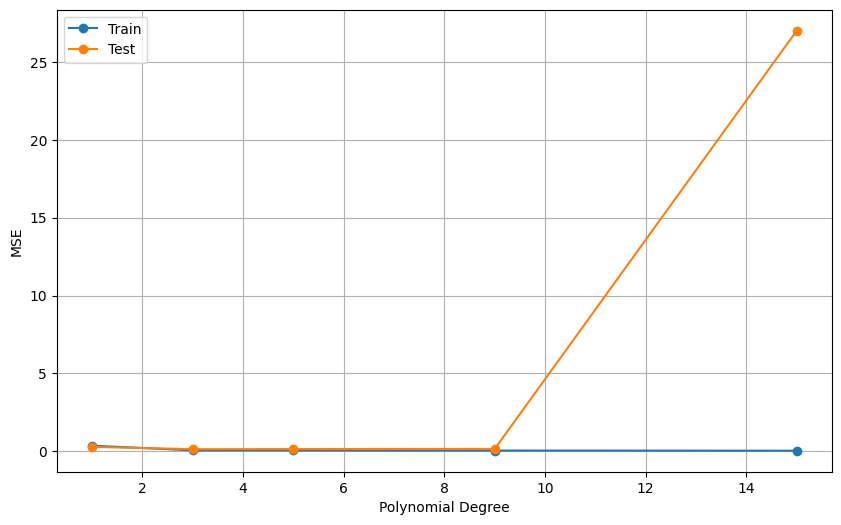

In [63]:
def compute_mse(X, y_true, coeffs):
    """Compute mean squared error for polynomial model"""
    y_pred = np.polyval(coeffs, X)
    mse = np.mean((y_pred - y_true) ** 2)
    return mse

train_errors = {}
test_errors = {}

for d in degrees:
    # TODO: Compute train and test MSE for each degree
    # 1. Use compute_mse() with models[d]
    # 2. Store results in train_errors and test_errors dictionaries

    train_mse = compute_mse(X_train, y_train, models[d])
    test_mse  = compute_mse(X_test,  y_test,  models[d])

    train_errors[d] = train_mse
    test_errors[d] = test_mse


# TODO: Create a plot with degree on x-axis and MSE on y-axis
# Plot both train error and test error on the same plot
# Use different colors/markers for train vs test

plt.figure(figsize=(10, 6))

# TODO: Plot training and test errors
plt.plot(degrees, [train_errors[d] for d in degrees], 'o-', label='Train')
plt.plot(degrees, [test_errors[d] for d in degrees], 'o-', label='Test')

print("=== Test Errors by Degree ===")
for re, te, d in zip(train_errors.values(), test_errors.values(), degrees):
    print(f"Degree {d}: Training Error = {re:.4f}, Test Error = {te:.4f}")

# TODO: Add labels, legend, title, grid
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

# TODO: You should observe:
# - Training error decreases monotonically
# - Test error: decreases initially, then increases (U-shaped curve)

# NOTE FOR GRADER: Since the degree 15 plot explodes, the next plot is pretty useless, but if you zoom in (or remove the outlier) it shows the correct pattern!

## Part (d): Multiple Runs to Measure Variance (7 points)

Repeat the entire experiment 50 times with different random training sets to measure how sensitive each model is to the specific training data.

C:\Users\archa\AppData\Local\Temp\ipykernel_3668\1776234619.py:17: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x=X_train_run, y=y_train_run, deg=d)
C:\Users\archa\AppData\Local\Temp\ipykernel_3668\1776234619.py:17: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x=X_train_run, y=y_train_run, deg=d)


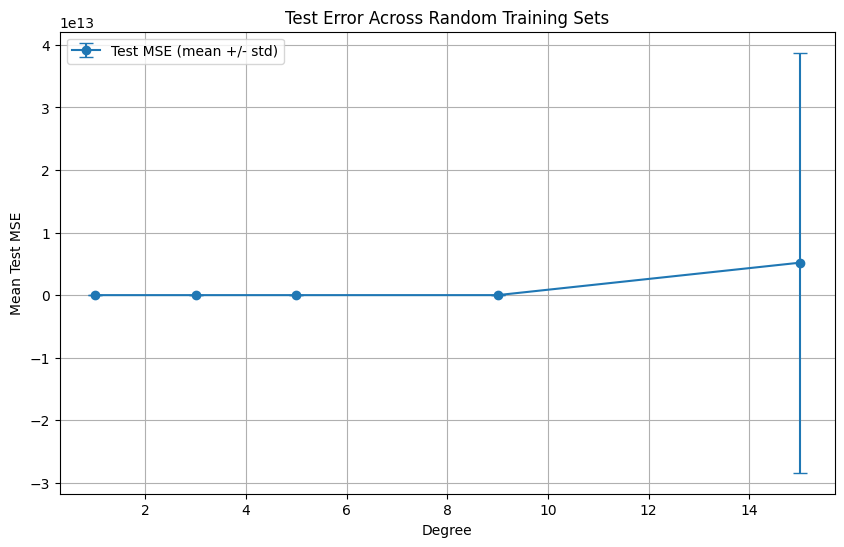


Mean Training MSE across 50 runs:
Degree 1: 0.2504 +/- 0.0808
Degree 3: 0.0703 +/- 0.0218
Degree 5: 0.0594 +/- 0.0202
Degree 9: 0.0433 +/- 0.0178
Degree 15: 0.0184 +/- 0.0139

Mean Test MSE across 50 runs:
Degree 1: 0.2978 +/- 0.0422
Degree 3: 0.1136 +/- 0.0293
Degree 5: 0.1665 +/- 0.1190
Degree 9: 221.8187 +/- 1116.5346
Degree 15: 5179451122121.4717 +/- 33561558523635.3516


In [64]:
n_runs = 50
test_mse_runs = {d: [] for d in degrees}
train_mse_runs = {d: [] for d in degrees}

# Use a fixed test set for all runs (for fair comparison)
np.random.seed(123)
X_test_fixed = np.random.uniform(0, 1, 100)
y_test_fixed = true_function(X_test_fixed) + np.random.normal(0, 0.3, 100)

for run in range(n_runs):
    # Generate new training data with different random seed
    X_train_run = np.random.uniform(0, 1, n_train)
    y_train_run = true_function(X_train_run) + np.random.normal(0, 0.3, n_train)

    for d in degrees:
        # TODO: Fit polynomial of degree d using the new training data (X_train_run, y_train_run)
        coeffs = np.polyfit(x=X_train_run, y=y_train_run, deg=d)

        # TODO: Compute test MSE on the fixed test set (X_test_fixed, y_test_fixed)
        test_mse  = compute_mse(X_test_fixed,  y_test_fixed,  coeffs)
        train_mse = compute_mse(X_train_run, y_train_run, coeffs)

        # TODO: Append the test_mse to the list for this degree
        test_mse_runs[d].append(test_mse)
        train_mse_runs[d].append(train_mse)

# TODO: Compute mean and standard deviation of test MSE across runs for each degree
# Hint: Use np.mean() and np.std() on the lists in test_mse_runs
mean_test_mse = [np.mean(test_mse_runs[d]) for d in degrees]
std_test_mse  = [np.std(test_mse_runs[d])  for d in degrees]

mean_train_mse = [np.mean(train_mse_runs[d]) for d in degrees]
std_train_mse  = [np.std(train_mse_runs[d])  for d in degrees]

# TODO: Create a plot with error bars
# x-axis: polynomial degree
# y-axis: mean test MSE
# error bars: +/- 1 standard deviation

plt.figure(figsize=(10, 6))

# TODO: Use plt.errorbar to visualize the variance
plt.errorbar(
    x=degrees,
    y=mean_test_mse,
    yerr=std_test_mse,
    fmt='o-',
    capsize=5,
    label="Test MSE (mean +/- std)"
)

# TODO: Add labels, title, grid
plt.xlabel("Degree")
plt.ylabel("Mean Test MSE")
plt.title("Test Error Across Random Training Sets")
plt.grid(True)
plt.legend()

plt.show()

# Print results (this part can stay or be commented out if you want them to write it)
print("\nMean Training MSE across 50 runs:")
for degree, mean, std in zip(degrees, mean_train_mse, std_train_mse):
    print(f"Degree {degree}: {mean:.4f} +/- {std:.4f}")

print("\nMean Test MSE across 50 runs:")
for degree, mean, std in zip(degrees, mean_test_mse, std_test_mse):
    print(f"Degree {degree}: {mean:.4f} +/- {std:.4f}")

## Part (e): Analysis and Interpretation (5 points)

Answer the following questions based on your experiments.

### (i) Which degree has the lowest training error on average? Does this surprise you?

**Your answer:** The degree 15 polynomial has the lowest mean training error. This is unsurprising, because with a more flexible model, the model becomes overfit to the training data, reducing training error. 

### (ii) Which degree has the lowest test error on average? Is it the same as part (i)?

**Your answer:** The degree 3 polynomial has the lowest mean test error, which is unsurprising, as the section of the true function that the model was fit to looks very cubic. This is not the same as the lowest training error. In fact, the degree 15 polynomial which had the lowest training error had an explosively large test error (1e13+). 

### (iii) Describe the bias-variance tradeoff you observe

**Low-degree polynomials (e.g., degree 1):** Stable, but underfit (low values for both test and training error), so MSE was higher than some of the other degree models.

**High-degree polynomials (e.g., degree 15):** Extremely overfit (leads to low training error), with wild variations between points, and huge test error (MSE > 1e10). 

**Best tradeoff (which degree?):** The degree 3 polynomial had the best tradeoff, not particularly over or underfit (this model had the lowest test error)

### (iv) The variance across runs tells us how sensitive the model is to the specific training data. Which models have the highest variance? Why does this make sense?

**Your answer:** The more "flexible" (higher degree) models have the highest variance. This makes sense because the more flexible a model can be, the more likely it is that the model is pulled off-line and overfits to a training point. The more "inflexible" (lower degree) models have less expressive power, but matched well to the data, they avoid overfitting and achieve a lower testing error.

### (v) If you had to choose a model for deployment (where you can't see the test set), how would you make the decision? What does this tell you about the importance of validation sets?

**Your answer:** If I didn't have access to a testing set, I would use a selected validation set from the provided data to evaluate the performance of my fit model, and select the model with the lowest validation error. 

These validation sets are extremely beneficial, because they allow you to recognize excessive variance (and overfitting) in your model before pushing to production, without requiring a provided "test set".